Raw data shape: (190757, 14)
         date     sku     brand    segment category   channel      region  \
0  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail  PL-Central   
1  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail    PL-North   
2  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail    PL-South   
3  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  Discount  PL-Central   
4  2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  Discount    PL-North   

   pack_type  price_unit  promotion_flag  delivery_days  stock_available  \
0  Multipack        2.38               0              1              141   
1     Single        1.55               1              3                0   
2     Carton        4.00               0              5              118   
3     Single        5.16               0              2               81   
4     Single        7.66               0              4              148   

   delivered_qty  units_sold  
0            128    

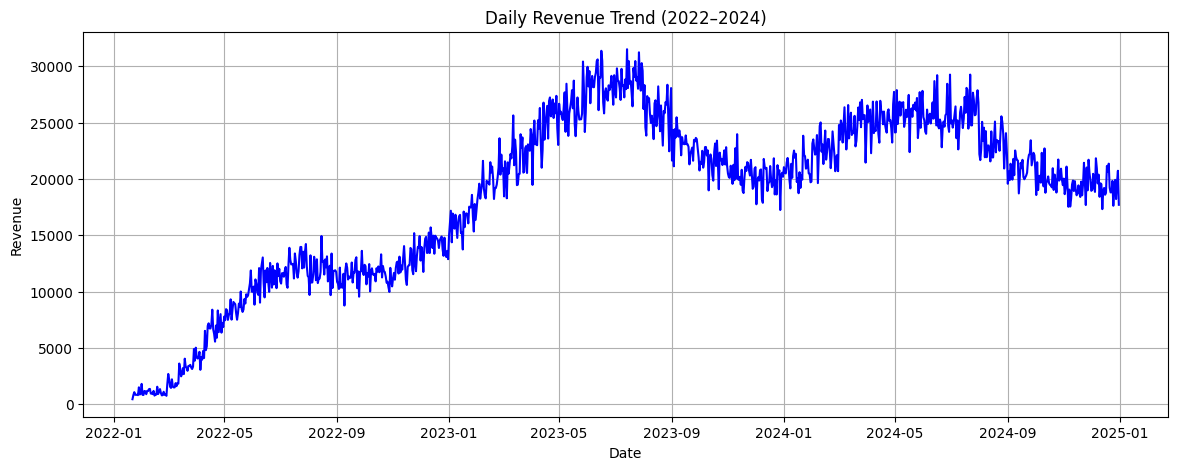

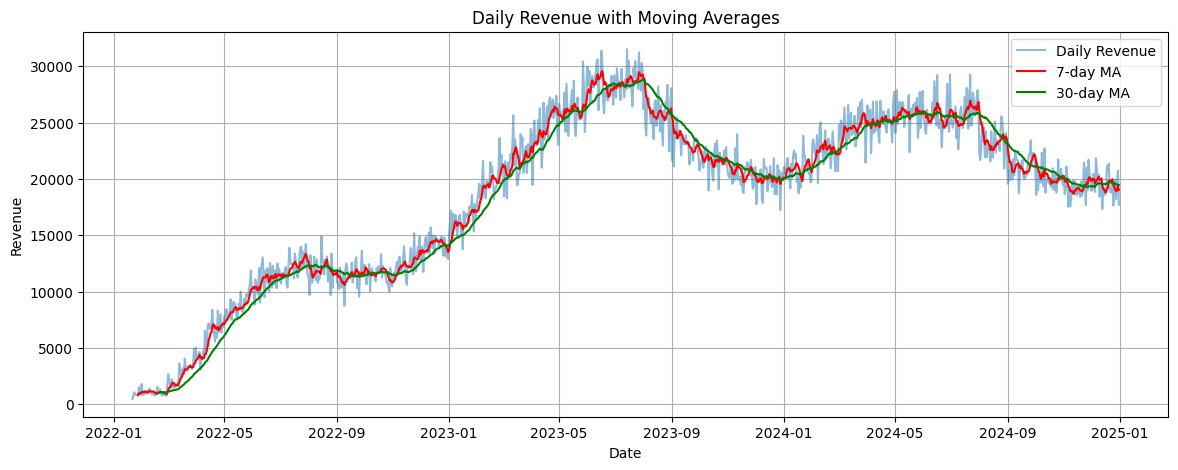

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


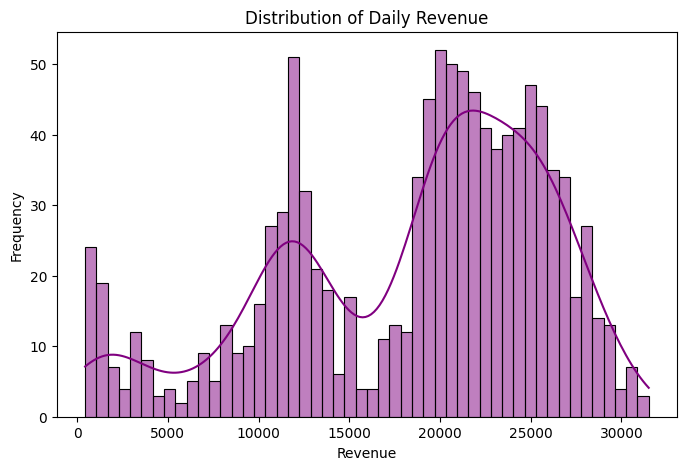

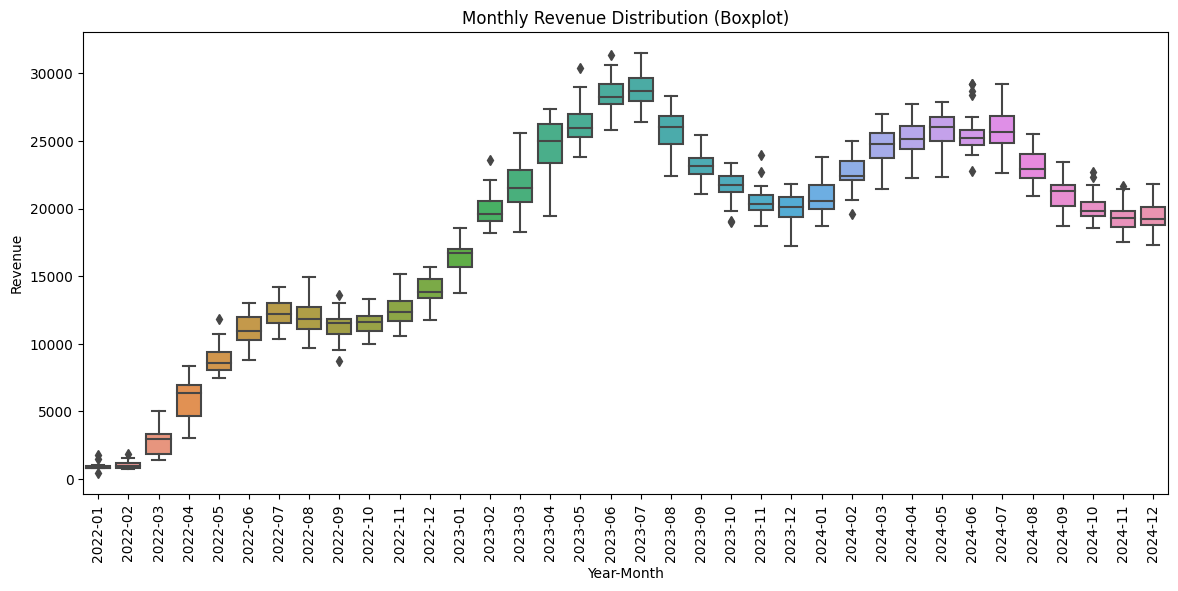

In [1]:
# 🛒 FMCG Sales Forecasting - Exploratory Data Analysis (EDA)

# --- 1. Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 2. Load raw dataset directly ---
data_path = "/kaggle/input/fmcg-daily-sales-data-to-2022-2024/"
df = pd.read_csv(os.path.join(data_path, "FMCG_2022_2024.csv"))

print("Raw data shape:", df.shape)
print(df.head())

# --- 3. Process into daily sales ---
df['date'] = pd.to_datetime(df['date'])
df['revenue'] = df['units_sold'] * df['price_unit']

daily = (
    df.groupby('date')['revenue']
    .sum()
    .reset_index()
    .rename(columns={'revenue': 'daily_revenue'})
)

print("✅ Daily dataset ready:", daily.shape)
print(daily.head())

# --- 4. Summary statistics ---
print("\nSummary statistics:")
print(daily['daily_revenue'].describe())

# --- 5. Plot overall trend ---
plt.figure(figsize=(14,5))
plt.plot(daily['date'], daily['daily_revenue'], color='blue')
plt.title("Daily Revenue Trend (2022–2024)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

# --- 6. Moving averages ---
daily['MA7'] = daily['daily_revenue'].rolling(window=7).mean()
daily['MA30'] = daily['daily_revenue'].rolling(window=30).mean()

plt.figure(figsize=(14,5))
plt.plot(daily['date'], daily['daily_revenue'], label='Daily Revenue', alpha=0.5)
plt.plot(daily['date'], daily['MA7'], label='7-day MA', color='red')
plt.plot(daily['date'], daily['MA30'], label='30-day MA', color='green')
plt.title("Daily Revenue with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()

# --- 7. Distribution of revenue ---
plt.figure(figsize=(8,5))
sns.histplot(daily['daily_revenue'], bins=50, kde=True, color='purple')
plt.title("Distribution of Daily Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

# --- 8. Monthly seasonality (boxplot) ---
daily['year_month'] = daily['date'].dt.to_period('M')

plt.figure(figsize=(14,6))
sns.boxplot(x=daily['year_month'].astype(str), y=daily['daily_revenue'])
plt.xticks(rotation=90)
plt.title("Monthly Revenue Distribution (Boxplot)")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.show()
